# NLP Text Processing methods




### NLTK

We can use some available data sets for educational purpose. One of such source are NLTK book corporas. To download it we need to do the following:

In [ ]:
import nltk
nltk.download('book')

To check what kind of books are available we need to import these and print the list as following:

In [ ]:
from nltk.book import *
texts()

NLTK Text object does have some useful methods that you can find here: [NLTK Text Docs](http://www.nltk.org/api/nltk.html#nltk.text.Text). Some are used below.

#### Word and sentences similarity

Word does have different meanings. This makes the comparison and analysis a bit more complex.

In [ ]:
text6.concordance("King")

text6.count("King")

We can also build a Corpus from a plain text. See the example below.

In [ ]:
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize.regexp import WordPunctTokenizer
from nltk.data import LazyLoader

trump = PlaintextCorpusReader('../datasets/','trump.txt',word_tokenizer=WordPunctTokenizer(),
             sent_tokenizer=LazyLoader(
                 'tokenizers/punkt/english.pickle'),
             encoding='utf8')
print(trump)
trump.words()

Corpuses contain large amount of texts, say multiple books, couple hundreds of articles from various magazines etc. NLTK has chosen a few books from over 25,000 pieces available in the whole dataset. We are going to pick Bible and Shakespeare's Macbeth in order to compare a few statistics between them. Let's take a look at other corporas and check the gutenberg and check the word distribution:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # general display style of seaborn
# how to display plot in notebook, jupyter's magic command
%matplotlib inline 

# Download necessary texts
nltk.download('gutenberg')
nltk.download('stopwords')

print("Books available in gutenberg dataset:")
nltk.corpus.gutenberg.fileids()

In [ ]:
nltk.corpus.stopwords.words("english")

Words occuring most often in Bible:


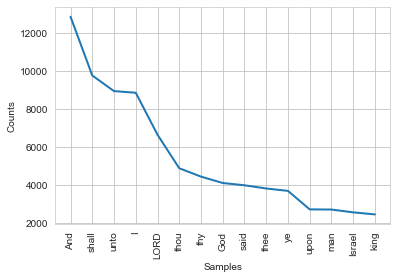

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:

%matplotlib inline

def lexical_richness(text: str) -> float:
  # Unique words in text divided by the total amount of words
  words = nltk.Text(nltk.corpus.gutenberg.words(text))
  return len(set(words))/len(words)

macbeth = "shakespeare-macbeth.txt"
bible = "bible-kjv.txt"

print("Macbeth richness: {}".format(lexical_richness(macbeth)))
print("Bible richness: {}".format(lexical_richness(bible)))

# Removing stopwords like: , . and or
bible_words = [
    word
    for word in nltk.corpus.gutenberg.words(bible)
    if word not in nltk.corpus.stopwords.words("english") and word.isalpha()
]

words_distribution = nltk.probability.FreqDist(bible_words)
print("Words occuring most often in Bible:") 
display(words_distribution.plot(15))

### Regular expression

The first solution that comes to our mind when it comes to text processing are regular expression. It is usually the best solution in software development. It is also used in many tools that we have mentioned before. Let's take an example to do a short recap how to use regular expressions in Python.

In [ ]:
example = "JU is a great company with many great developers."

import re

pattern = "\\s+"
words = re.split(pattern, example)
print(words)

['JU', 'is', 'a', 'great', 'company', 'with', 'many', 'great', 'developers.']


Python does have some methods for Strings that can do the same as above, but with less code.

In [ ]:
words = example.split(' ')
print(words)

text = "Well, what can I say about regexes? \
They are quite annoying to be honest, but once you get a grasp you're gonna be fine. \
Yeah, I could use some basic boring text, here you go if that's what you miss: \
Ala ma kota, kot ma Alę. m?ke a m1sta.e and see what happens... \
This sentence: 'Mr. & Mrs. Smith, been looking for easter egg here, failed."
text.split(' ')

['JU', 'is', 'a', 'great', 'company', 'with', 'many', 'great', 'developers.']


['Well,',
 'what',
 'can',
 'I',
 'say',
 'about',
 'regexes?',
 'They',
 'are',
 'quite',
 'annoying',
 'to',
 'be',
 'honest,',
 'but',
 'once',
 'you',
 'get',
 'a',
 'grasp',
 "you're",
 'gonna',
 'be',
 'fine.',
 'Yeah,',
 'I',
 'could',
 'use',
 'some',
 'basic',
 'boring',
 'text,',
 'here',
 'you',
 'go',
 'if',
 "that's",
 'what',
 'you',
 'miss:',
 'Ala',
 'ma',
 'kota,',
 'kot',
 'ma',
 'Alę.',
 'm?ke',
 'a',
 'm1sta.e',
 'and',
 'see',
 'what',
 'happens...',
 'This',
 'sentence:',
 "'Mr.",
 '&',
 'Mrs.',
 'Smith,',
 'been',
 'looking',
 'for',
 'easter',
 'egg',
 'here,',
 'failed.']

That was too naive, let's make something more intelligent:

In [ ]:
print("Using regex:")
display(re.split('(?<=[.!?]) +',text))

Using regex:


['Well, what can I say about regexes?',
 "They are quite annoying to be honest, but once you get a grasp you're gonna be fine.",
 "Yeah, I could use some basic boring text, here you go if that's what you miss: Ala ma kota, kot ma Alę.",
 'm?ke a m1sta.e and see what happens...',
 "This sentence: 'Mr.",
 '& Mrs.',
 'Smith, been looking for easter egg here, failed.']

Our regex only splits the text if either of . ! ? is followed by one or more whitespace signs. This approach is quite powerful, yet limited (as could be seen), keep in mind it has it's uses but is far from perfect (later we will see more sophisticated approaches).

All in all, when faced with a choice: do something using traditional methods or using machine learning, ALWAYS pick the first one.

In [ ]:
# Examples of some other regex functions

text = re.sub(r"Mr. & Mrs. Smith", "Now works like a charm", text) #substitute string
found_text = re.findall(", been .*,", text) # find all occurences of string
display(found_text)

# findall returns list, we need to access it's element
re.sub(found_text[0], " but life", text)

[', been looking for easter egg here,']

"Well, what can I say about regexes? They are quite annoying to be honest, but once you get a grasp you're gonna be fine. Yeah, I could use some basic boring text, here you go if that's what you miss: Ala ma kota, kot ma Alę. m?ke a m1sta.e and see what happens... This sentence: 'Now works like a charm but life failed."

### Tokenization

NLTK is a more advanced tool than just regular expressions. We can easily tokenize sentences. Tokenization is a process of getting words from sentences. **Tokenizers** are used to divide a string into it's logical subsets. Above, we have used the sentence tokenizer. Tokenization on the other hand is a common name for dividing a text into separate words and can be done in NLTK using word_tokenizer:

In [ ]:
tokens = nltk.word_tokenize(example)
print("Tokens: " + str(tokens))

Tokens: ['JU', 'is', 'a', 'great', 'company', 'with', 'many', 'great', 'developers', '.']


After a little fun we can use nltk to separate text into sentences in 'smarter' fashion:

In [ ]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

sent_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Well, what can I say about regexes?',
 "They are quite annoying to be honest, but once you get a grasp you're gonna be fine.",
 "Yeah, I could use some basic boring text, here you go if that's what you miss: Ala ma kota, kot ma Alę.",
 'm?ke a m1sta.e and see what happens...',
 "This sentence: 'Now works like a charm, been looking for easter egg here, failed."]

__Tokenizers__ are used to divide a string into it's logical subsets. Above, we
have used
the sentence tokenizer. __Tokenization__ on the other hand is a common
name for dividing
a text into separate words and can be done in NLTK using
__word_tokenizer__:

In [ ]:
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.tokenize import TweetTokenizer # Yes, this tokenizer was based on Tweets

text = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
print("Normal tokenizer:")
print(word_tokenize(text))

print("This tokenizer is better suited for emoji handling")
twitter_tokenizer = TweetTokenizer()
twitter_tokenizer.tokenize(text)

Normal tokenizer:
['This', 'is', 'a', 'cooool', '#', 'dummysmiley', ':', ':', '-', ')', ':', '-P', '<', '3', 'and', 'some', 'arrows', '<', '>', '-', '>', '<', '--']
This tokenizer is better suited for emoji handling


['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

As you can see there are other tokenizers available and each is focused on
different
'kind' of tokenization.

They are usually implemented as a set of
complicated rules trailed down to certain language
(e.g. will be different for
polish and english) and __ARE NOT__ a subset of machine
learning (in
this part of course at least).

Here are some other NLTK's tokenizers you could
use:

- __PunktTokenizer__: been used above for sentence tokenization. This one
actually uses unsupervised algorithm to infer sentence boundaries.
- __NISTTokenizer__: tokenizer for non-european text (say in Chinese).
- __SExprTokenizer__: find parenthesized expressions in strings, see below:

In [ ]:
from nltk.tokenize import SExprTokenizer

SExprTokenizer().tokenize('(a b (c d)) e f (g)')

['(a b (c d))', 'e', 'f', '(g)']

### Tagging

What is great with NLTK is that we can tag each word. A tag give us a meaning of a word. We can think about it as a type of word.

In [ ]:
tags = nltk.pos_tag(tokens)
print("Tagged: " + str(tags))

Tagged: [('JU', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('company', 'NN'), ('with', 'IN'), ('many', 'JJ'), ('great', 'JJ'), ('developers', 'NNS'), ('.', '.')]


Some tags are shown in the table below.

| tag  | short | description   |
|------|-------|---------------|
| DT   | determiner | all an another any both del each either every half la many much nary neither no some such that the them these this those |
| IN   | preposition or conjunction, subordinating | astride among uppon whether out inside pro despite on by throughout below within for towards near behind atop around if like until below next into if beside ... |
| JJ   | adjective or numeral, ordinal | third ill-mannered pre-war regrettable oiled calamitous first separable ectoplasmic battery-powered participatory fourth still-to-be-named multilingual multi-disciplinary ... |
| NN   | noun, common, singular or mass | common-carrier cabbage knuckle-duster Casino afghan shed thermostat investment slide humour falloff slick wind hyena override subhumanity machinist ... |
| NNP  | noun, proper, singular | Motown Venneboerger Czestochowa Ranzer Conchita Trumplane Christos Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA Shannon A.K.C. Meltex Liverpool ... |
| NNS  | noun, common, plural | undergraduates scotches bric-a-brac products bodyguards facets coasts divestitures storehouses designs clubs fragrances averages subjectivists apprehensions muses factory-jobs ... |
| VBZ  | verb, present tense, 3rd person singular | bases reconstructs marks mixes displeases seals carps weaves snatches slumps stretches authorizes smolders pictures emerges stockpiles seduces fizzes uses bolsters slaps speaks pleads ... |

To get the full list of tags, use the following code:

In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


We can find the token in NLTK's corporas too:

In [ ]:
text6.tokens

['SCENE',
 '1',
 ':',
 '[',
 'wind',
 ']',
 '[',
 'clop',
 'clop',
 'clop',
 ']',
 'KING',
 'ARTHUR',
 ':',
 'Whoa',
 'there',
 '!',
 '[',
 'clop',
 'clop',
 'clop',
 ']',
 'SOLDIER',
 '#',
 '1',
 ':',
 'Halt',
 '!',
 'Who',
 'goes',
 'there',
 '?',
 'ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.',
 'King',
 'of',
 'the',
 'Britons',
 ',',
 'defeator',
 'of',
 'the',
 'Saxons',
 ',',
 'sovereign',
 'of',
 'all',
 'England',
 '!',
 'SOLDIER',
 '#',
 '1',
 ':',
 'Pull',
 'the',
 'other',
 'one',
 '!',
 'ARTHUR',
 ':',
 'I',
 'am',
 ',',
 '...',
 'and',
 'this',
 'is',
 'my',
 'trusty',
 'servant',
 'Patsy',
 '.',
 'We',
 'have',
 'ridden',
 'the',
 'length',
 'and',
 'breadth',
 'of',
 'the',
 'land',
 'in',
 'search',
 'of',
 'knights',
 'who',
 'will',
 'join',
 'me',
 'in',
 'my',
 'court',
 'at',
 'Camelot',
 '.',
 'I',
 'must',
 'speak',
 'with',
 'your',
 'lord',
 'and',
 'ma

Another feature of NLTK are the stopwords that are used in each language that NLTK supports:

In [ ]:
english_stopwords = set(nltk.corpus.stopwords.words('english'))
print(english_stopwords)

{'re', 'theirs', 'don', "shan't", 'or', 'for', 'until', 'if', 'over', 't', 'o', 'had', "you're", 'wasn', 'himself', 'about', "don't", 'll', 'herself', 'all', 'i', 'there', "she's", 'through', 'we', 'is', 'of', 'can', "didn't", 'are', 'was', 'our', "you've", 'aren', "aren't", "wouldn't", 'before', 'most', 'didn', 'shan', 'how', 'hadn', "mustn't", 'should', 'me', 'which', 'into', 'here', 'no', 'more', 's', "that'll", 'after', 'few', 'they', 'any', 'on', 'have', "needn't", 'between', 'y', 'from', 'won', 'again', 'she', 'above', 'ours', 'wouldn', 'yourselves', 'this', "it's", 'weren', 'whom', 'only', 'being', 'down', 'a', "you'll", 'such', 'did', 'but', 'against', "hasn't", 'haven', 'were', 'will', 'mustn', 'shouldn', "won't", 'to', 've', 'yours', 'below', 'just', 'you', "mightn't", 'd', 'yourself', 'my', 'then', 'now', 'with', 'am', 'not', 'when', 'own', 'needn', "hadn't", "weren't", 'themselves', 'do', "haven't", 'what', 'as', 'ain', "wasn't", 'both', 'in', "you'd", 'myself', 'because', 

__POS-tagging__ is another method of describing our text. For each tokenized word we can obtain it's __Part Of Speech__. Those informations are frequently used throughout more advanced machine learning methods.

Up until now everything was easy, fortunately this one is no exception.

In [ ]:
# we have already imported nltk.tokenize.word_tokenizer

nltk.download('averaged_perceptron_tagger')

words = word_tokenize(
    "Another text. You know, this is the hardest part, coming up with all those texts. "
    "Lorem Ipsum or some random stuff is pretty boring IMO. "
    "You may feel like somebody didn't care (or at least I do)."
    "Or maybe it's just an act? I will not address this question."
)

nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Another', 'DT'),
 ('text', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ('know', 'VBP'),
 (',', ','),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('hardest', 'JJS'),
 ('part', 'NN'),
 (',', ','),
 ('coming', 'VBG'),
 ('up', 'RP'),
 ('with', 'IN'),
 ('all', 'PDT'),
 ('those', 'DT'),
 ('texts', 'NNS'),
 ('.', '.'),
 ('Lorem', 'NNP'),
 ('Ipsum', 'NNP'),
 ('or', 'CC'),
 ('some', 'DT'),
 ('random', 'JJ'),
 ('stuff', 'NN'),
 ('is', 'VBZ'),
 ('pretty', 'JJ'),
 ('boring', 'JJ'),
 ('IMO', 'NNP'),
 ('.', '.'),
 ('You', 'PRP'),
 ('may', 'MD'),
 ('feel', 'VB'),
 ('like', 'IN'),
 ('somebody', 'NN'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('care', 'VB'),
 ('(', '('),
 ('or', 'CC'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('I', 'PRP'),
 ('do', 'VBP'),
 (')', ')'),
 ('.Or', 'VB'),
 ('maybe', 'RB'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('just', 'RB'),
 ('an', 'DT'),
 ('act', 'NN'),
 ('?', '.'),
 ('I', 'PRP'),
 ('will', 'MD'),
 ('not', 'RB'),
 ('address', 'VB'),
 ('this', 'DT'),
 ('question', 'NN'),
 ('.', '.')]

Look at `act` and `address` towards the end of output.

POS can be used to dismabiguate word meaning, `act` can be both noun (NN) and verb (VB), same goes for address. 

This tokenizer is __based on simple one layer neural network__ hence it takes context into account (words before and after an act). 

Context (N words before and after certain word) is called __N-gram__ in Machine Learning and we will make use of it more later in this course.

<ADD N-GRAM PHOTO>

This is more sophisticated approach and __should be__ used when more abstract reasoning is needed (like word disambiguation).

With __NLTK__ we can create and train our own taggers, or choose a pre-made one and train is as seen below (this one takes the next word as it's context).

In [ ]:
import nltk
from nltk.corpus import brown 
nltk.download("brown")
 
brown_tagged_sents = brown.tagged_sents(categories="news")
brown_sents = brown.sents(categories="news") 
unigram_tagger = nltk.BigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

### Unicode

Each alphabet is different and some languages use letter that are not used in any other language. Unicode allows use to standardize the text. Let's see an of some german and portugese text below.

In [ ]:
sample = """Minderjährige Schülerinnen. O português é uma língua romântica"""

type(sample)

str

If we convert it to ASCII it will look as following:

In [ ]:
ascii(sample)

"'Minderj\\xe4hrige Sch\\xfclerinnen. O portugu\\xeas \\xe9 uma l\\xedngua rom\\xe2ntica'"

It is not what we expected. It's hard to work with such a text. We can go a step further and encode the string to be a unicode encoded one:

In [ ]:
sample.encode('utf8')

b'Minderj\xc3\xa4hrige Sch\xc3\xbclerinnen. O portugu\xc3\xaas \xc3\xa9 uma l\xc3\xadngua rom\xc3\xa2ntica'

We could also ignore the ASCII characters that we cannot do anything with in the further processing:

In [ ]:
sample.encode('ascii', 'ignore')

b'Minderjhrige Schlerinnen. O portugus  uma lngua romntica'

Now we have all letter that make sense, but we have text that does not make any sense anymore. To solve it, we need to normalize it and only after the normalization remove the ascii signs.

In [ ]:
import unicodedata

unicodedata.normalize('NFKD', sample).encode('ascii','ignore')

b'Minderjahrige Schulerinnen. O portugues e uma lingua romantica'

More about [Unicode normalization forms](http://unicode.org/reports/tr15/)

### Lemmatization

Lemmatization is a process of getting one word for many forms of the word. 

Let's see an example:

In [ ]:
from nltk import WordNetLemmatizer
import nltk
# from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('do',pos='v'))
print(wordnet_lemmatizer.lemmatize('does',pos='v'))
print(wordnet_lemmatizer.lemmatize('doing',pos='v'))

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\Legion/nltk_data'
    - 'C:\\Users\\Legion\\anaconda3\\envs\\snowflakes\\nltk_data'
    - 'C:\\Users\\Legion\\anaconda3\\envs\\snowflakes\\share\\nltk_data'
    - 'C:\\Users\\Legion\\anaconda3\\envs\\snowflakes\\lib\\nltk_data'
    - 'C:\\Users\\Legion\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


We can set the main part of speech as one of the following:

ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'

In [ ]:
wordnet_lemmatizer.lemmatize('are',pos='v')

### Stemming

Stemming is similar to lemmatization, but the main difference is that is just reduce the word to it root. It gives in many cases different results than lemmatization as the second solution is based on part of speech.

In [ ]:
from nltk import PorterStemmer, LancasterStemmer, word_tokenize
from nltk.stem.snowball import SnowballStemmer

sample = "This is a new training about machine learning usage for chatbots"

tokens = word_tokenize(sample)

porter = PorterStemmer()
p_stem = [porter.stem(t) for t in tokens]
print(p_stem)

lancaster = LancasterStemmer()
l_stem = [lancaster.stem(t) for t in tokens]
print(l_stem)

snowball = SnowballStemmer('english')
s_stem = [snowball.stem(t) for t in tokens]
print(s_stem)

As per usual there are other stemmers and lemmatizers available in NLTK. 
Some
of them may be faster (PorterStemmer), but Snowball is considered de-facto
standard.

A few traits of each should be noticed:
- Stemming is faster (it
doesn't have to consult dictionary and complicated
morphological rules).
-
Stemming may not produce a dictionary word, see `studi` above.
- Lemmatization
produces smaller set of words. It is useful as we do not have to keep
track of
all the different form of word (running, runner, runs etc.). More memory
efficient.
- Lemmatization is not as crude, when it does not find the lemma it
returns the original
form. It __may__ produce more words this way, depends on
the kind of text we are
processing.

### Sentence extraction

In this section we show some features of SpaCy. One of the most commonly used is the sentence extraction. An example of Trump speech divided into sentences can be found below.

In [ ]:
import spacy

file = open("../datasets/trump.txt", "r",encoding='utf-8') 
trump = file.read() 

nlp = spacy.load("en_core_web_sm")
doc = nlp(trump)

for span in doc.sents:
    print("> ", span)

Each sentence can next be tokenized and we can get a tag and pos of it.

In [ ]:
for span in doc.sents:
    for i in range(span.start, span.end):
        token = doc[i]
        print(i, token.text, token.tag_, token.pos_)

### Noun chunks

Chunking is a process of getting just specific part of speeches. The most popular is the noun chunking. It allow us to get the general meaning of what is the text about.

In [ ]:
for np in doc.noun_chunks:
    print(np)

### Named entity recognition

The last feature that we show here is the named entitiy resolution. It returns a NER of each word.

In [ ]:
for entity in doc.ents:
    print(entity.label_, entity.text)

### Bag of Words

Many machine learning methods cannot use strings as features, we have to encode it using numbers.

We can easily do this using __Bag Of Words (BOW)__ technique and marvelous __sklearn__ library:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

corpus = [
     'Bag Of Words is based on counting',
     'words occurences throughout multiple documents.',
     'This is the third document.',
     'As you can see most of the words occur only once.',
     'This gives us a pretty sparse matrix, see below. Really, see below',
]

X = vectorizer.fit_transform(corpus)
print(X.toarray())

Each document is represented by the row. Values ranging from 0 to N represent whether and how many times the word occured in the document. You can see what word corresponds to which column by issuing get_feature_names() on vectorizer object.

In [ ]:
vectorizer.get_feature_names()

This approach allows us to easily describe the whole corpora, but it lacks informations crucial for solving some tasks.

### TF-IDF

Look at word is. It is used in most documents many times, yet it does not tell us anything about them. Let's think about sentiment analysis: if words like great or awesome occur frequently in comparison with another documents it may suggest positive attitude.

TF-IDF is one way to encode this information and I'll walk you through it step by step.

First part of TF-IDF is, yes, you guessed it, TF, which means Term Frequency. It can be calculated as:

\begin{equation}
tf_{ij}=\frac{n_{ij}}{\sum n_{ij}},
\end{equation}
where $n_{ij}$ is the number of occurence of word $i$ in document $j$.

In [ ]:
import numpy as np

corpus = [
'Tom has cat',
'Tom has fish',
'Tom is polish',
]

def tf(corpus):
    vec = CountVectorizer()
    bow_representation = vec.fit_transform(corpus)
    words_per_corpus = bow_representation.sum(axis=1)
    return np.divide(np.array(bow_representation.toarray()),np.array(words_per_corpus).reshape((5,))[:,None])


For each document we count how many times it occurred (BoW implementaion) and divide by the count of all words in this document.

Next part is IDF, which stands for Inverse Document Frequency:

\begin{equation}
idf=\log(\frac{N}{df_{t}}),
\end{equation}
where $N$ is the total number of documents and $df_{t}$ is number of documents containing $t$.

In [ ]:
def idf(corpus):
    document_count = len(corpus)
    bow_representation = CountVectorizer().fit_transform(corpus)
    return np.log(document_count / np.count_nonzero(bow_representation.toarray(), axis=0))

First we calculate number of documents in corpus (number of rows in our case). Next, for each word, we calculate documents containing said word at least once.

Taking logarithm allows us to dampen the effect of idf. For example, the difference between term occuring in 40 out of 50 documents and 45 out of 50 documents will be smaller than difference between 1/50 and 5/50. This puts a bigger emphasis on rarely occuring terms as they are more informative.

Finally, for the whole thing to work, we simply multiply both:

In [ ]:
def tf_idf(corpus):
    return tf(corpus) * idf(corpus)

Let's calculate it:

In [ ]:
corpus = [
     'Bag Of Words is based on counting',
     'words occurences throughout multiple documents.',
     'This is the third document.',
     'As you can see most of the words occur only once.',
     'This gives us a pretty sparse matrix, see below. Really, see below',
]

tfidf_result = tf_idf(corpus)

print(tfidf_result.shape)

In Jupyter it's easier to display results with pandas:

In [ ]:
import pandas as pd
pd.DataFrame(tfidf_result).head()

There are many versions of tf-idf, some use different smoothing, use additional logarithm for tf part and so on. Each transforms corpora a little differently, and appropriate should be used based on effect we would like to obtain.

### Summary
This constitutes the first NLP-related part of our course and we have gathered some useful and interesting informations 

### References

[1] Natural Language Processing with Python, Edward Loper, Ewan Klein, Steven Bird. O'Reilly 2009

[2] Applied Text Analysis with Python, Tony Ojeda , Rebecca Bilbro , Benjamin Bengfort. O'Reilly 2018

[3] Feature Engineering for Machine Learning, Amanda Casari , Alice Zheng. O'Reilly 2018